<a href="https://colab.research.google.com/github/dsri07/Letsgrowmore-task/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:

#importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
#using sklearn get the iris data
from sklearn.datasets import load_iris
iris = load_iris()
#loading the dataset in form of pandas DataFrame
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


SPLITTING THE DATA USING TRAIN_TEST_SPLIT

In [128]:
features = [x for x in df.columns if x!="target"]
x= df[features]
y= df["target"]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

FITTING THE TRAINING DATA IN THE DECISION TREE CLASSIFIER

In [129]:
decisiontree = DecisionTreeClassifier(criterion='entropy')
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
#predicting the y using testing data of X
y_pred = decisiontree.predict(X_test)
prediction = pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
prediction.head()

,actual_value,predicted_value
115,2,2
106,2,1
98,1,1
68,1,1
37,0,0


In [131]:
#accuracy of decision tree classifier model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

PLOTTING DECISION TREE

[Text(251.10000000000002, 1009.5428571428572, 'Petal length <= 2.6\nentropy = 1.585\nsamples = 120\nvalue = [41, 40, 39]\nclass = Setosa'),
 Text(167.4, 854.2285714285715, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = Setosa'),
 Text(334.8, 854.2285714285715, 'Petal length <= 4.75\nentropy = 1.0\nsamples = 79\nvalue = [0, 40, 39]\nclass = Versicolor'),
 Text(251.10000000000002, 698.9142857142858, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Versicolor'),
 Text(418.5, 698.9142857142858, 'Petal width <= 1.75\nentropy = 0.567\nsamples = 45\nvalue = [0, 6, 39]\nclass = Virginica'),
 Text(167.4, 543.6, 'Petal length <= 4.95\nentropy = 0.991\nsamples = 9\nvalue = [0, 5, 4]\nclass = Versicolor'),
 Text(83.7, 388.28571428571433, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Versicolor'),
 Text(251.10000000000002, 388.28571428571433, 'Petal width <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(167.4, 232.97142857142865, 'en

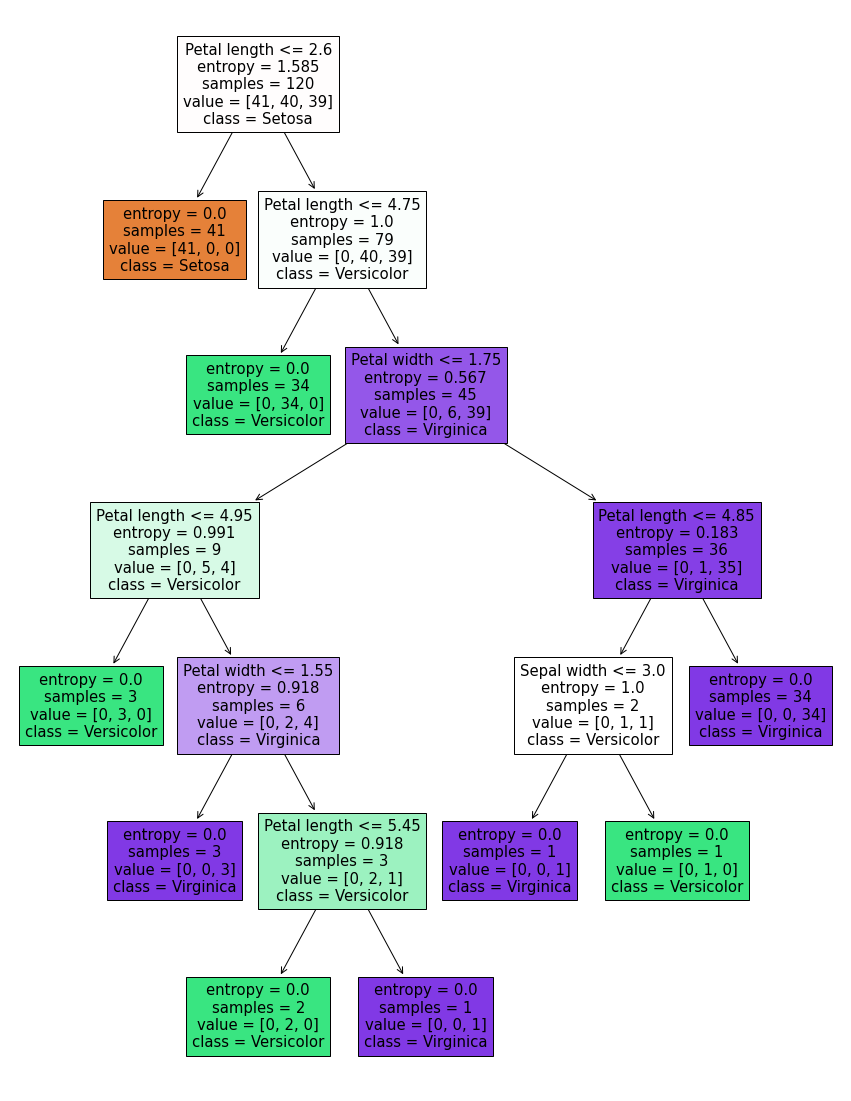

In [132]:
from sklearn.tree import plot_tree
from sklearn import tree
features = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
classes = ["Setosa", "Versicolor", "Virginica"]
plt.figure(figsize = (15,20))
tree.plot_tree(decisiontree, feature_names = features, class_names = classes, filled = True)